<a href="https://colab.research.google.com/github/Almehedi06/IBM-DS-Professional-Certificate-Capstone-/blob/main/ML_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [ ]:
data = pd.read_csv('/content/drive/My Drive/OC/IBM/dataset_part_2.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,6/4/2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0


In [ ]:
X = pd.read_csv('/content/drive/My Drive/OC/IBM/dataset_part_3.csv')
X.head(100)

,Orbit,LaunchSite,LandingPad,Serial
0,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,1.0
2,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0
4,NaN,NaN,NaN,NaN
...,...,...,...,...
95,0.0,1.0,0.0,0.0
96,NaN,NaN,NaN,NaN
97,0.0,1.0,0.0,0.0
98,NaN,NaN,NaN,NaN


In [ ]:
X = X.dropna()

In [ ]:
X.head(100)

,Orbit,LaunchSite,LandingPad,Serial
1,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0
...,...,...,...,...
171,0.0,0.0,0.0,0.0
173,0.0,0.0,0.0,0.0
175,0.0,0.0,0.0,0.0
177,0.0,1.0,0.0,0.0


In [ ]:
y = data['Class'].to_numpy() 

In [ ]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [ ]:


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)



In [ ]:
Y_test.shape

(18,)

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge
lr=LogisticRegression()
gscv = GridSearchCV(lr,parameters,scoring='accuracy',cv=10)
logreg_cv = gscv.fit(X_train,Y_train)

In [ ]:


print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.6678571428571429


In [ ]:
print('Accuracy=  ',logreg_cv.score(X_test,Y_test))

Accuracy=   0.6666666666666666


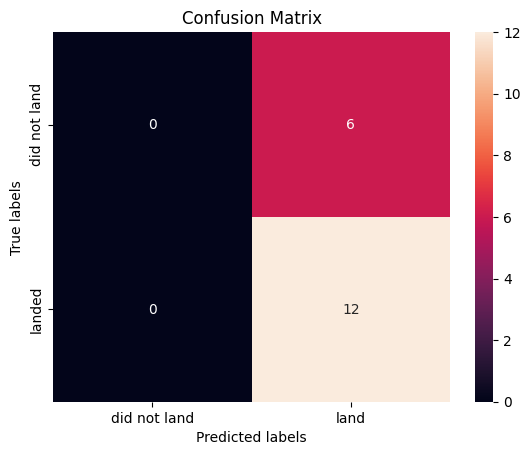

In [ ]:


yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)



In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
gscv = GridSearchCV(svm,parameters,scoring='accuracy',cv=10)
svm_cv = gscv.fit(X_train,Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.6678571428571429


In [ ]:
print("accuracy: ",svm_cv.score(X_test,Y_test))

accuracy:  0.6666666666666666


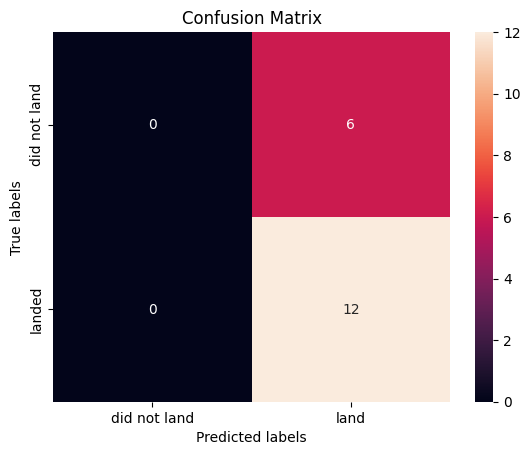

In [ ]:


yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)



In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [ ]:
gscv = GridSearchCV(tree,parameters,scoring='accuracy',cv=10)
tree_cv = gscv.fit(X_train,Y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features

In [ ]:


print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.6678571428571429


In [ ]:


print("accuracy: ",tree_cv.score(X_test,Y_test))



accuracy:  0.6666666666666666


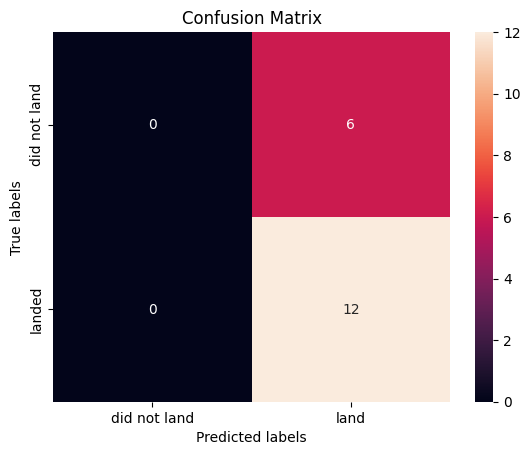

In [ ]:


yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)



In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:


gscv = GridSearchCV(KNN,parameters,scoring='accuracy',cv=10)
knn_cv = gscv.fit(X_train,Y_train)



In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1}
accuracy : 0.6535714285714286


In [ ]:


print("accuracy: ",knn_cv.score(X_test,Y_test))



accuracy:  0.6666666666666666


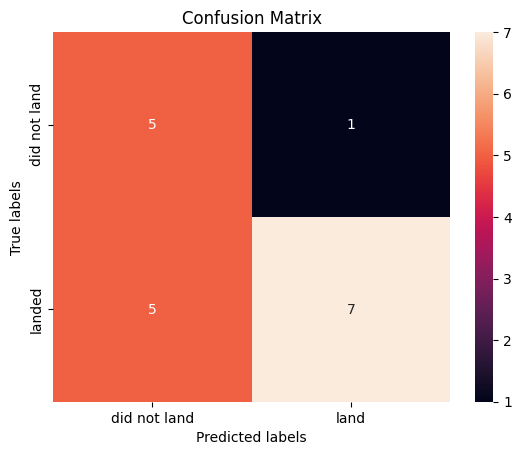

In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [ ]:
algorithms = {'KNN':knn_cv.best_score_,'Tree':tree_cv.best_score_,'LogisticRegression':logreg_cv.best_score_}
bestalgorithm = max(algorithms, key=algorithms.get)
print('Best Algorithm is',bestalgorithm,'with a score of',algorithms[bestalgorithm])
if bestalgorithm == 'Tree':
    print('Best Params is :',tree_cv.best_params_)
if bestalgorithm == 'KNN':
    print('Best Params is :',knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best Params is :',logreg_cv.best_params_)

Best Algorithm is Tree with a score of 0.6678571428571429
Best Params is : {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


**Author: Md Abdullah Al Mehedi**

Graduate Research Assistant

Villanova Center of Resilient Water System (VCRWS)